In [1]:
import numpy as np
import scipy.special as sp
import h5py
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from seaborn import kdeplot
from sklearn.neighbors import KernelDensity
plt.rc('font', size=12.0)

In [6]:
data = h5py.File('nl_53_init', 'r')['markov_chain_0']['data']
log_wgt = np.array(data['log_wgt'])
prob_gw17 = np.array(data['prob_gw17'])
prob_gw19 = np.array(data['prob_gw19'])
log_wgt_pop = np.array(data['log_wgt_pop'])
log_wgt_6304 = np.array(data['log_wgt_6304'])
log_wgt_6397 = np.array(data['log_wgt_6397'])
log_wgt_M13 = np.array(data['log_wgt_M13'])
log_wgt_M28 = np.array(data['log_wgt_M28'])
log_wgt_M30 = np.array(data['log_wgt_M30'])
log_wgt_wCen = np.array(data['log_wgt_wCen'])
log_wgt_X7 = np.array(data['log_wgt_X7'])
log_wgt_1810b = np.array(data['log_wgt_1810b'])
log_wgt_1724b = np.array(data['log_wgt_1724b'])
log_wgt_1702 = np.array(data['log_wgt_1702'])
log_wgt_0030 = np.array(data['log_wgt_0030'])
log_wgt_0740 = np.array(data['log_wgt_0740'])
Rns_6304 = np.array(data['Rns_6304'])
Rns_6397 = np.array(data['Rns_6397'])
Rns_M13 = np.array(data['Rns_M13'])
Rns_M28 = np.array(data['Rns_M28'])
Rns_M30 = np.array(data['Rns_M30'])
Rns_wCen = np.array(data['Rns_wCen'])
Rns_X7 = np.array(data['Rns_X7'])
Rns_1810b = np.array(data['Rns_1810b'])
Rns_1724b = np.array(data['Rns_1724b'])
Rns_1702 = np.array(data['Rns_1702'])
Rns_0030 = np.array(data['Rns_0030'])
Rns_0740 = np.array(data['Rns_0740'])
mean_NS = np.array(data['mean_NS'])
mean_WD = np.array(data['mean_WD'])
mean_LM = np.array(data['mean_LMS'])
width_NS = 10**np.array(data['log10_width_NS'])
width_WD = 10**np.array(data['log10_width_WD'])
width_LM = 10**np.array(data['log10_width_LMS'])
skew_NS = np.array(data['skewness_NS'])
skew_WD = np.array(data['skewness_WD'])
skew_LM = np.array(data['skewness_LMS'])
M_max = np.array(data['M_max'])
mf_6304 = np.array(data['mf_6304'])
mf_6397 = np.array(data['mf_6397'])
mf_M13 = np.array(data['mf_M13'])
mf_M28 = np.array(data['mf_M28'])
mf_M30 = np.array(data['mf_M30'])
mf_wCen = np.array(data['mf_wCen'])
mf_X7 = np.array(data['mf_X7'])
mf_1810b = np.array(data['mf_1810b'])
mf_1724b = np.array(data['mf_1724b'])
mf_1702 = np.array(data['mf_1702'])
mf_0030 = np.array(data['mf_0030'])
mf_0740 = np.array(data['mf_0740'])
m1_gw17 = np.array(data['m1_gw17'])
m2_gw17 = np.array(data['m2_gw17'])
m1_gw19 = np.array(data['m1_gw19'])
m2_gw19 = np.array(data['m2_gw19'])

def f_sn(mean, width, skew, mass):
  cf = 1.0/width/np.sqrt(2.0*np.pi)
  exf = np.exp(-0.5*((mass-mean)/width)**2)
  erf = sp.erf((mass-mean)*skew/width/np.sqrt(2.0))
  return cf*exf*(1.0+erf)

fsn_gw19 = f_sn(mean_NS, width_NS, skew_NS, m1_gw19) \
          *f_sn(mean_NS, width_NS, skew_NS, m2_gw19)
fsn_gw17 = f_sn(mean_NS, width_NS, skew_NS, m1_gw17) \
          *f_sn(mean_NS, width_NS, skew_NS, m2_gw17)
fsn_em = f_sn(mean_LM, width_LM, skew_LM, M_max*mf_6304) \
        *f_sn(mean_LM, width_LM, skew_LM, M_max*mf_6397) \
        *f_sn(mean_LM, width_LM, skew_LM, M_max*mf_M13) \
        *f_sn(mean_LM, width_LM, skew_LM, M_max*mf_M28) \
        *f_sn(mean_LM, width_LM, skew_LM, M_max*mf_M30) \
        *f_sn(mean_LM, width_LM, skew_LM, M_max*mf_wCen) \
        *f_sn(mean_LM, width_LM, skew_LM, M_max*mf_X7) \
        *f_sn(mean_LM, width_LM, skew_LM, M_max*mf_1810b) \
        *f_sn(mean_LM, width_LM, skew_LM, M_max*mf_1724b) \
        *f_sn(mean_LM, width_LM, skew_LM, M_max*mf_1702) \
        *f_sn(mean_LM, width_LM, skew_LM, M_max*mf_0740)
log_wgt_gw17 = np.log(fsn_gw17)+prob_gw17
log_wgt_gw19 = np.log(fsn_gw19)+prob_gw19
log_wgt_em = log_wgt_6304  +log_wgt_6397  +log_wgt_M13  +log_wgt_M28 \
            +log_wgt_M30   +log_wgt_wCen  +log_wgt_X7   +log_wgt_1810b \
            +log_wgt_1724b +log_wgt_1702  +log_wgt_0030 +log_wgt_0740 +np.log(fsn_em)
log_wgt_calc = log_wgt_pop+log_wgt_em+log_wgt_gw17+log_wgt_gw19

In [41]:
print('log_wgt=', log_wgt, ', log_wgt_calc=', log_wgt_calc, ', error=', (log_wgt-log_wgt_calc)*100.0/log_wgt, '%')

log_wgt= [-10.26076089] , log_wgt_calc= [-10.26076089] , error= [1.73121356e-13] %


In [7]:
log_wgt_53 = log_wgt
log_fsn_em_53 = np.log(fsn_em)
log_wgt_pop_53 = log_wgt_pop
log_wgt_6304_53 = log_wgt_6304
log_wgt_6397_53 = log_wgt_6397
log_wgt_M13_53 = log_wgt_M13
log_wgt_M28_53 = log_wgt_M28
log_wgt_M30_53 = log_wgt_M30
log_wgt_wCen_53 = log_wgt_wCen
log_wgt_X7_53 = log_wgt_X7
log_wgt_1810b_53 = log_wgt_1810b
log_wgt_1724b_53 = log_wgt_1724b
log_wgt_1702_53 = log_wgt_1702
log_wgt_0030_53 = log_wgt_0030
log_wgt_0740_53 = log_wgt_0740
log_wgt_gw17_53 = log_wgt_gw17
log_wgt_gw19_53 = log_wgt_gw19
log_wgt_em_53 = log_wgt_em
Rns_6304_53 = Rns_6304
Rns_6397_53 = Rns_6397
Rns_M13_53 = Rns_M13
Rns_M28_53 = Rns_M28
Rns_M30_53 = Rns_M30
Rns_wCen_53 = Rns_wCen
Rns_X7_53 = Rns_X7
Rns_1810b_53 = Rns_1810b
Rns_1724b_53 = Rns_1724b
Rns_1702_53 = Rns_1702
Rns_0030_53 = Rns_0030
Rns_0740_53 = Rns_0740

In [86]:
log_wgt_54 = log_wgt
log_fsn_em_54 = np.log(fsn_em)
log_wgt_pop_54 = log_wgt_pop
log_wgt_6304_54 = log_wgt_6304
log_wgt_6397_54 = log_wgt_6397
log_wgt_M13_54 = log_wgt_M13
log_wgt_M28_54 = log_wgt_M28
log_wgt_M30_54 = log_wgt_M30
log_wgt_wCen_54 = log_wgt_wCen
log_wgt_X7_54 = log_wgt_X7
log_wgt_1810b_54 = log_wgt_1810b
log_wgt_1724b_54 = log_wgt_1724b
log_wgt_1702_54 = log_wgt_1702
log_wgt_0030_54 = log_wgt_0030
log_wgt_0740_54 = log_wgt_0740
log_wgt_gw17_54 = log_wgt_gw17
log_wgt_gw19_54 = log_wgt_gw19
log_wgt_em_54 = log_wgt_em
Rns_6304_54 = Rns_6304
Rns_6397_54 = Rns_6397
Rns_M13_54 = Rns_M13
Rns_M28_54 = Rns_M28
Rns_M30_54 = Rns_M30
Rns_wCen_54 = Rns_wCen
Rns_X7_54 = Rns_X7
Rns_1810b_54 = Rns_1810b
Rns_1724b_54 = Rns_1724b
Rns_1702_54 = Rns_1702
Rns_0030_54 = Rns_0030
Rns_0740_54 = Rns_0740

In [5]:
log_wgt_h = log_wgt
log_fsn_em_h = np.log(fsn_em)
log_wgt_pop_h = log_wgt_pop
log_wgt_6304_h = log_wgt_6304
log_wgt_6397_h = log_wgt_6397
log_wgt_M13_h = log_wgt_M13
log_wgt_M28_h = log_wgt_M28
log_wgt_M30_h = log_wgt_M30
log_wgt_wCen_h = log_wgt_wCen
log_wgt_X7_h = log_wgt_X7
log_wgt_1810b_h = log_wgt_1810b
log_wgt_1724b_h = log_wgt_1724b
log_wgt_1702_h = log_wgt_1702
log_wgt_0030_h = log_wgt_0030
log_wgt_0740_h = log_wgt_0740
log_wgt_gw17_h = log_wgt_gw17
log_wgt_gw19_h = log_wgt_gw19
log_wgt_em_h = log_wgt_em
Rns_6304_h = Rns_6304
Rns_6397_h = Rns_6397
Rns_M13_h = Rns_M13
Rns_M28_h = Rns_M28
Rns_M30_h = Rns_M30
Rns_wCen_h = Rns_wCen
Rns_X7_h = Rns_X7
Rns_1810b_h = Rns_1810b
Rns_1724b_h = Rns_1724b
Rns_1702_h = Rns_1702
Rns_0030_h = Rns_0030
Rns_0740_h = Rns_0740

In [8]:
print(log_wgt_6304_53==log_wgt_6304_h, 
      log_wgt_6397_53==log_wgt_6397_h, 
      log_wgt_M13_53==log_wgt_M13_h, 
      log_wgt_M28_53==log_wgt_M28_h, 
      log_wgt_M30_53==log_wgt_M30_h, 
      log_wgt_wCen_53==log_wgt_wCen_h, 
      log_wgt_X7_53==log_wgt_X7_h, 
      log_wgt_1810b_53==log_wgt_1810b_h, 
      log_wgt_1724b_53==log_wgt_1724b_h, 
      log_wgt_1702_53==log_wgt_1702_h, 
      log_wgt_0030_53==log_wgt_0030_h, 
      log_wgt_0740_53==log_wgt_0740_h)

[False] [ True] [False] [ True] [ True] [False] [False] [False] [ True] [ True] [ True] [False]


In [90]:
print((log_wgt_6304_53-log_wgt_6304_h)/log_wgt_6304_53, (log_wgt_M13_53-log_wgt_M13_h)/log_wgt_M13_53, (log_wgt_wCen_53-log_wgt_wCen_h)/log_wgt_wCen_53, (log_wgt_X7_53-log_wgt_X7_h)/log_wgt_X7_53, (log_wgt_1810b_53-log_wgt_1810b_h)/log_wgt_1810b_53, (log_wgt_0740_53-log_wgt_0740_h)/log_wgt_0740_53)

[2.9069143e-14] [-3.54221701e-11] [5.22109138e-12] [-1.59778953e-09] [-7.70737546e-13] [1.17471162e-08]


 - 6304
 - M13
 - wCen
 - X7
 - 1810b
 - 0740

In [12]:
print(Rns_6304_53==Rns_6304_h,
      Rns_6397_53==Rns_6397_h,
      Rns_M13_53==Rns_M13_h,
      Rns_M28_53==Rns_M28_h,
      Rns_M30_53==Rns_M30_h,
      Rns_wCen_53==Rns_wCen_h,
      Rns_X7_53==Rns_X7_h,
      Rns_1810b_53==Rns_1810b_h,
      Rns_1724b_53==Rns_1724b_h,
      Rns_1702_53==Rns_1702_h,
      Rns_0030_53==Rns_0030_h,
      Rns_0740_53==Rns_0740_h)

[False] [ True] [False] [ True] [False] [False] [False] [False] [ True] [ True] [ True] [False]


In [13]:
print((Rns_6304_53-Rns_6304_h)/Rns_6304_53, (Rns_M13_53-Rns_M13_h)/Rns_M13_53, (Rns_M30_53-Rns_M30_h)/Rns_M30_53, (Rns_wCen_53-Rns_wCen_h)/Rns_wCen_53, (Rns_X7_53-Rns_X7_h)/Rns_X7_53, (Rns_1810b_53-Rns_1810b_h)/Rns_1810b_53, (Rns_0740_53-Rns_0740_h)/Rns_0740_53)

[-1.69320078e-11] [-3.88618696e-11] [2.44244542e-09] [8.60586656e-12] [-5.88500807e-10] [-4.00783206e-13] [7.51569083e-09]


In [14]:
data_hm = h5py.File('nl_0_out', 'r')['markov_chain_0']['data']
data_rw = h5py.File('nl_53_init', 'r')['markov_chain_0']['data']

R_0_hm = np.array(data_hm['R_0']); R_0_rw = np.array(data_rw['R_0']);
R_1_hm = np.array(data_hm['R_1']); R_1_rw = np.array(data_rw['R_1']);
R_2_hm = np.array(data_hm['R_2']); R_2_rw = np.array(data_rw['R_2']);
R_3_hm = np.array(data_hm['R_3']); R_3_rw = np.array(data_rw['R_3']);
R_4_hm = np.array(data_hm['R_4']); R_4_rw = np.array(data_rw['R_4']);
R_5_hm = np.array(data_hm['R_5']); R_5_rw = np.array(data_rw['R_5']);
R_6_hm = np.array(data_hm['R_6']); R_6_rw = np.array(data_rw['R_6']);
R_7_hm = np.array(data_hm['R_7']); R_7_rw = np.array(data_rw['R_7']);
R_8_hm = np.array(data_hm['R_8']); R_8_rw = np.array(data_rw['R_8']);
R_9_hm = np.array(data_hm['R_9']); R_9_rw = np.array(data_rw['R_9']);
R_10_hm = np.array(data_hm['R_10']); R_10_rw = np.array(data_rw['R_10']);
R_11_hm = np.array(data_hm['R_11']); R_11_rw = np.array(data_rw['R_11']);
R_12_hm = np.array(data_hm['R_12']); R_12_rw = np.array(data_rw['R_12']);
R_13_hm = np.array(data_hm['R_13']); R_13_rw = np.array(data_rw['R_13']);
R_14_hm = np.array(data_hm['R_14']); R_14_rw = np.array(data_rw['R_14']);
R_15_hm = np.array(data_hm['R_15']); R_15_rw = np.array(data_rw['R_15']);
R_16_hm = np.array(data_hm['R_16']); R_16_rw = np.array(data_rw['R_16']);
R_17_hm = np.array(data_hm['R_17']); R_17_rw = np.array(data_rw['R_17']);
R_18_hm = np.array(data_hm['R_18']); R_18_rw = np.array(data_rw['R_18']);
R_19_hm = np.array(data_hm['R_19']); R_19_rw = np.array(data_rw['R_19']);
R_20_hm = np.array(data_hm['R_20']); R_20_rw = np.array(data_rw['R_20']);
R_21_hm = np.array(data_hm['R_21']); R_21_rw = np.array(data_rw['R_21']);
R_22_hm = np.array(data_hm['R_22']); R_22_rw = np.array(data_rw['R_22']);
R_23_hm = np.array(data_hm['R_23']); R_23_rw = np.array(data_rw['R_23']);
R_24_hm = np.array(data_hm['R_24']); R_24_rw = np.array(data_rw['R_24']);
R_25_hm = np.array(data_hm['R_25']); R_25_rw = np.array(data_rw['R_25']);
R_26_hm = np.array(data_hm['R_26']); R_26_rw = np.array(data_rw['R_26']);
R_27_hm = np.array(data_hm['R_27']); R_27_rw = np.array(data_rw['R_27']);
R_28_hm = np.array(data_hm['R_28']); R_28_rw = np.array(data_rw['R_28']);
R_29_hm = np.array(data_hm['R_29']); R_29_rw = np.array(data_rw['R_29']);
R_30_hm = np.array(data_hm['R_30']); R_30_rw = np.array(data_rw['R_30']);
R_31_hm = np.array(data_hm['R_31']); R_31_rw = np.array(data_rw['R_31']);
R_32_hm = np.array(data_hm['R_32']); R_32_rw = np.array(data_rw['R_32']);
R_33_hm = np.array(data_hm['R_33']); R_33_rw = np.array(data_rw['R_33']);
R_34_hm = np.array(data_hm['R_34']); R_34_rw = np.array(data_rw['R_34']);
R_35_hm = np.array(data_hm['R_35']); R_35_rw = np.array(data_rw['R_35']);
R_36_hm = np.array(data_hm['R_36']); R_36_rw = np.array(data_rw['R_36']);
R_37_hm = np.array(data_hm['R_37']); R_37_rw = np.array(data_rw['R_37']);
R_38_hm = np.array(data_hm['R_38']); R_38_rw = np.array(data_rw['R_38']);
R_39_hm = np.array(data_hm['R_39']); R_39_rw = np.array(data_rw['R_39']);
R_40_hm = np.array(data_hm['R_40']); R_40_rw = np.array(data_rw['R_40']);
R_41_hm = np.array(data_hm['R_41']); R_41_rw = np.array(data_rw['R_41']);
R_42_hm = np.array(data_hm['R_42']); R_42_rw = np.array(data_rw['R_42']);
R_43_hm = np.array(data_hm['R_43']); R_43_rw = np.array(data_rw['R_43']);
R_44_hm = np.array(data_hm['R_44']); R_44_rw = np.array(data_rw['R_44']);
R_45_hm = np.array(data_hm['R_45']); R_45_rw = np.array(data_rw['R_45']);
R_46_hm = np.array(data_hm['R_46']); R_46_rw = np.array(data_rw['R_46']);
R_47_hm = np.array(data_hm['R_47']); R_47_rw = np.array(data_rw['R_47']);
R_48_hm = np.array(data_hm['R_48']); R_48_rw = np.array(data_rw['R_48']);
R_49_hm = np.array(data_hm['R_49']); R_49_rw = np.array(data_rw['R_49']);
R_50_hm = np.array(data_hm['R_50']); R_50_rw = np.array(data_rw['R_50']);
R_51_hm = np.array(data_hm['R_51']); R_51_rw = np.array(data_rw['R_51']);
R_52_hm = np.array(data_hm['R_52']); R_52_rw = np.array(data_rw['R_52']);
R_53_hm = np.array(data_hm['R_53']); R_53_rw = np.array(data_rw['R_53']);
R_54_hm = np.array(data_hm['R_54']); R_54_rw = np.array(data_rw['R_54']);
R_55_hm = np.array(data_hm['R_55']); R_55_rw = np.array(data_rw['R_55']);
R_56_hm = np.array(data_hm['R_56']); R_56_rw = np.array(data_rw['R_56']);
R_57_hm = np.array(data_hm['R_57']); R_57_rw = np.array(data_rw['R_57']);
R_58_hm = np.array(data_hm['R_58']); R_58_rw = np.array(data_rw['R_58']);
R_59_hm = np.array(data_hm['R_59']); R_59_rw = np.array(data_rw['R_59']);
R_60_hm = np.array(data_hm['R_60']); R_60_rw = np.array(data_rw['R_60']);
R_61_hm = np.array(data_hm['R_61']); R_61_rw = np.array(data_rw['R_61']);
R_62_hm = np.array(data_hm['R_62']); R_62_rw = np.array(data_rw['R_62']);
R_63_hm = np.array(data_hm['R_63']); R_63_rw = np.array(data_rw['R_63']);
R_64_hm = np.array(data_hm['R_64']); R_64_rw = np.array(data_rw['R_64']);
R_65_hm = np.array(data_hm['R_65']); R_65_rw = np.array(data_rw['R_65']);
R_66_hm = np.array(data_hm['R_66']); R_66_rw = np.array(data_rw['R_66']);
R_67_hm = np.array(data_hm['R_67']); R_67_rw = np.array(data_rw['R_67']);
R_68_hm = np.array(data_hm['R_68']); R_68_rw = np.array(data_rw['R_68']);
R_69_hm = np.array(data_hm['R_69']); R_69_rw = np.array(data_rw['R_69']);

In [15]:
truth=np.array([R_0_hm==R_0_rw,
R_1_hm==R_1_rw,
R_2_hm==R_2_rw,
R_3_hm==R_3_rw,
R_4_hm==R_4_rw,
R_5_hm==R_5_rw,
R_6_hm==R_6_rw,
R_7_hm==R_7_rw,
R_8_hm==R_8_rw,
R_9_hm==R_9_rw,
R_10_hm==R_10_rw,
R_11_hm==R_11_rw,
R_12_hm==R_12_rw,
R_13_hm==R_13_rw,
R_14_hm==R_14_rw,
R_15_hm==R_15_rw,
R_16_hm==R_16_rw,
R_17_hm==R_17_rw,
R_18_hm==R_18_rw,
R_19_hm==R_19_rw,
R_20_hm==R_20_rw,
R_21_hm==R_21_rw,
R_22_hm==R_22_rw,
R_23_hm==R_23_rw,
R_24_hm==R_24_rw,
R_25_hm==R_25_rw,
R_26_hm==R_26_rw,
R_27_hm==R_27_rw,
R_28_hm==R_28_rw,
R_29_hm==R_29_rw,
R_30_hm==R_30_rw,
R_31_hm==R_31_rw,
R_32_hm==R_32_rw,
R_33_hm==R_33_rw,
R_34_hm==R_34_rw,
R_35_hm==R_35_rw,
R_36_hm==R_36_rw,
R_37_hm==R_37_rw,
R_38_hm==R_38_rw,
R_39_hm==R_39_rw,
R_40_hm==R_40_rw,
R_41_hm==R_41_rw,
R_42_hm==R_42_rw,
R_43_hm==R_43_rw,
R_44_hm==R_44_rw,
R_45_hm==R_45_rw,
R_46_hm==R_46_rw,
R_47_hm==R_47_rw,
R_48_hm==R_48_rw,
R_49_hm==R_49_rw,
R_50_hm==R_50_rw,
R_51_hm==R_51_rw,
R_52_hm==R_52_rw,
R_53_hm==R_53_rw,
R_54_hm==R_54_rw,
R_55_hm==R_55_rw,
R_56_hm==R_56_rw,
R_57_hm==R_57_rw,
R_58_hm==R_58_rw,
R_59_hm==R_59_rw,
R_60_hm==R_60_rw,
R_61_hm==R_61_rw,
R_62_hm==R_62_rw,
R_63_hm==R_63_rw,
R_64_hm==R_64_rw,
R_65_hm==R_65_rw,
R_66_hm==R_66_rw,
R_67_hm==R_67_rw,
R_68_hm==R_68_rw,
R_69_hm==R_69_rw])

In [16]:
for i in range(70):
  print(i, truth[i][0])

0 True
1 True
2 True
3 True
4 True
5 True
6 True
7 True
8 True
9 False
10 False
11 True
12 True
13 True
14 True
15 True
16 False
17 False
18 False
19 True
20 True
21 False
22 False
23 False
24 False
25 False
26 True
27 True
28 True
29 True
30 True
31 True
32 True
33 True
34 True
35 True
36 True
37 True
38 True
39 True
40 True
41 True
42 True
43 True
44 True
45 False
46 False
47 False
48 False
49 False
50 False
51 True
52 True
53 True
54 False
55 False
56 False
57 True
58 False
59 False
60 False
61 True
62 True
63 True
64 True
65 False
66 False
67 True
68 True
69 True


In [17]:
data_hm = h5py.File('nl_0_out', 'r')['markov_chain_0']['data']
data_rw = h5py.File('nl_53_init', 'r')['markov_chain_0']['data']

P_0_hm = np.array(data_hm['P_0']); P_0_rw = np.array(data_rw['P_0']);
P_1_hm = np.array(data_hm['P_1']); P_1_rw = np.array(data_rw['P_1']);
P_2_hm = np.array(data_hm['P_2']); P_2_rw = np.array(data_rw['P_2']);
P_3_hm = np.array(data_hm['P_3']); P_3_rw = np.array(data_rw['P_3']);
P_4_hm = np.array(data_hm['P_4']); P_4_rw = np.array(data_rw['P_4']);
P_5_hm = np.array(data_hm['P_5']); P_5_rw = np.array(data_rw['P_5']);
P_6_hm = np.array(data_hm['P_6']); P_6_rw = np.array(data_rw['P_6']);
P_7_hm = np.array(data_hm['P_7']); P_7_rw = np.array(data_rw['P_7']);
P_8_hm = np.array(data_hm['P_8']); P_8_rw = np.array(data_rw['P_8']);
P_9_hm = np.array(data_hm['P_9']); P_9_rw = np.array(data_rw['P_9']);
P_10_hm = np.array(data_hm['P_10']); P_10_rw = np.array(data_rw['P_10']);
P_11_hm = np.array(data_hm['P_11']); P_11_rw = np.array(data_rw['P_11']);
P_12_hm = np.array(data_hm['P_12']); P_12_rw = np.array(data_rw['P_12']);
P_13_hm = np.array(data_hm['P_13']); P_13_rw = np.array(data_rw['P_13']);
P_14_hm = np.array(data_hm['P_14']); P_14_rw = np.array(data_rw['P_14']);
P_15_hm = np.array(data_hm['P_15']); P_15_rw = np.array(data_rw['P_15']);
P_16_hm = np.array(data_hm['P_16']); P_16_rw = np.array(data_rw['P_16']);
P_17_hm = np.array(data_hm['P_17']); P_17_rw = np.array(data_rw['P_17']);
P_18_hm = np.array(data_hm['P_18']); P_18_rw = np.array(data_rw['P_18']);
P_19_hm = np.array(data_hm['P_19']); P_19_rw = np.array(data_rw['P_19']);
P_20_hm = np.array(data_hm['P_20']); P_20_rw = np.array(data_rw['P_20']);
P_21_hm = np.array(data_hm['P_21']); P_21_rw = np.array(data_rw['P_21']);
P_22_hm = np.array(data_hm['P_22']); P_22_rw = np.array(data_rw['P_22']);
P_23_hm = np.array(data_hm['P_23']); P_23_rw = np.array(data_rw['P_23']);
P_24_hm = np.array(data_hm['P_24']); P_24_rw = np.array(data_rw['P_24']);
P_25_hm = np.array(data_hm['P_25']); P_25_rw = np.array(data_rw['P_25']);
P_26_hm = np.array(data_hm['P_26']); P_26_rw = np.array(data_rw['P_26']);
P_27_hm = np.array(data_hm['P_27']); P_27_rw = np.array(data_rw['P_27']);
P_28_hm = np.array(data_hm['P_28']); P_28_rw = np.array(data_rw['P_28']);
P_29_hm = np.array(data_hm['P_29']); P_29_rw = np.array(data_rw['P_29']);
P_30_hm = np.array(data_hm['P_30']); P_30_rw = np.array(data_rw['P_30']);
P_31_hm = np.array(data_hm['P_31']); P_31_rw = np.array(data_rw['P_31']);
P_32_hm = np.array(data_hm['P_32']); P_32_rw = np.array(data_rw['P_32']);
P_33_hm = np.array(data_hm['P_33']); P_33_rw = np.array(data_rw['P_33']);
P_34_hm = np.array(data_hm['P_34']); P_34_rw = np.array(data_rw['P_34']);
P_35_hm = np.array(data_hm['P_35']); P_35_rw = np.array(data_rw['P_35']);
P_36_hm = np.array(data_hm['P_36']); P_36_rw = np.array(data_rw['P_36']);
P_37_hm = np.array(data_hm['P_37']); P_37_rw = np.array(data_rw['P_37']);
P_38_hm = np.array(data_hm['P_38']); P_38_rw = np.array(data_rw['P_38']);
P_39_hm = np.array(data_hm['P_39']); P_39_rw = np.array(data_rw['P_39']);
P_40_hm = np.array(data_hm['P_40']); P_40_rw = np.array(data_rw['P_40']);
P_41_hm = np.array(data_hm['P_41']); P_41_rw = np.array(data_rw['P_41']);
P_42_hm = np.array(data_hm['P_42']); P_42_rw = np.array(data_rw['P_42']);
P_43_hm = np.array(data_hm['P_43']); P_43_rw = np.array(data_rw['P_43']);
P_44_hm = np.array(data_hm['P_44']); P_44_rw = np.array(data_rw['P_44']);
P_45_hm = np.array(data_hm['P_45']); P_45_rw = np.array(data_rw['P_45']);
P_46_hm = np.array(data_hm['P_46']); P_46_rw = np.array(data_rw['P_46']);
P_47_hm = np.array(data_hm['P_47']); P_47_rw = np.array(data_rw['P_47']);
P_48_hm = np.array(data_hm['P_48']); P_48_rw = np.array(data_rw['P_48']);
P_49_hm = np.array(data_hm['P_49']); P_49_rw = np.array(data_rw['P_49']);
P_50_hm = np.array(data_hm['P_50']); P_50_rw = np.array(data_rw['P_50']);
P_51_hm = np.array(data_hm['P_51']); P_51_rw = np.array(data_rw['P_51']);
P_52_hm = np.array(data_hm['P_52']); P_52_rw = np.array(data_rw['P_52']);
P_53_hm = np.array(data_hm['P_53']); P_53_rw = np.array(data_rw['P_53']);
P_54_hm = np.array(data_hm['P_54']); P_54_rw = np.array(data_rw['P_54']);
P_55_hm = np.array(data_hm['P_55']); P_55_rw = np.array(data_rw['P_55']);
P_56_hm = np.array(data_hm['P_56']); P_56_rw = np.array(data_rw['P_56']);
P_57_hm = np.array(data_hm['P_57']); P_57_rw = np.array(data_rw['P_57']);
P_58_hm = np.array(data_hm['P_58']); P_58_rw = np.array(data_rw['P_58']);
P_59_hm = np.array(data_hm['P_59']); P_59_rw = np.array(data_rw['P_59']);
P_60_hm = np.array(data_hm['P_60']); P_60_rw = np.array(data_rw['P_60']);
P_61_hm = np.array(data_hm['P_61']); P_61_rw = np.array(data_rw['P_61']);
P_62_hm = np.array(data_hm['P_62']); P_62_rw = np.array(data_rw['P_62']);
P_63_hm = np.array(data_hm['P_63']); P_63_rw = np.array(data_rw['P_63']);
P_64_hm = np.array(data_hm['P_64']); P_64_rw = np.array(data_rw['P_64']);
P_65_hm = np.array(data_hm['P_65']); P_65_rw = np.array(data_rw['P_65']);
P_66_hm = np.array(data_hm['P_66']); P_66_rw = np.array(data_rw['P_66']);
P_67_hm = np.array(data_hm['P_67']); P_67_rw = np.array(data_rw['P_67']);
P_68_hm = np.array(data_hm['P_68']); P_68_rw = np.array(data_rw['P_68']);
P_69_hm = np.array(data_hm['P_69']); P_69_rw = np.array(data_rw['P_69']);
P_70_hm = np.array(data_hm['P_70']); P_70_rw = np.array(data_rw['P_70']);
P_71_hm = np.array(data_hm['P_71']); P_71_rw = np.array(data_rw['P_71']);
P_72_hm = np.array(data_hm['P_72']); P_72_rw = np.array(data_rw['P_72']);
P_73_hm = np.array(data_hm['P_73']); P_73_rw = np.array(data_rw['P_73']);
P_74_hm = np.array(data_hm['P_74']); P_74_rw = np.array(data_rw['P_74']);
P_75_hm = np.array(data_hm['P_75']); P_75_rw = np.array(data_rw['P_75']);
P_76_hm = np.array(data_hm['P_76']); P_76_rw = np.array(data_rw['P_76']);
P_77_hm = np.array(data_hm['P_77']); P_77_rw = np.array(data_rw['P_77']);
P_78_hm = np.array(data_hm['P_78']); P_78_rw = np.array(data_rw['P_78']);
P_79_hm = np.array(data_hm['P_79']); P_79_rw = np.array(data_rw['P_79']);
P_80_hm = np.array(data_hm['P_80']); P_80_rw = np.array(data_rw['P_80']);
P_81_hm = np.array(data_hm['P_81']); P_81_rw = np.array(data_rw['P_81']);
P_82_hm = np.array(data_hm['P_82']); P_82_rw = np.array(data_rw['P_82']);
P_83_hm = np.array(data_hm['P_83']); P_83_rw = np.array(data_rw['P_83']);
P_84_hm = np.array(data_hm['P_84']); P_84_rw = np.array(data_rw['P_84']);
P_85_hm = np.array(data_hm['P_85']); P_85_rw = np.array(data_rw['P_85']);
P_86_hm = np.array(data_hm['P_86']); P_86_rw = np.array(data_rw['P_86']);
P_87_hm = np.array(data_hm['P_87']); P_87_rw = np.array(data_rw['P_87']);
P_88_hm = np.array(data_hm['P_88']); P_88_rw = np.array(data_rw['P_88']);
P_89_hm = np.array(data_hm['P_89']); P_89_rw = np.array(data_rw['P_89']);
P_90_hm = np.array(data_hm['P_90']); P_90_rw = np.array(data_rw['P_90']);
P_91_hm = np.array(data_hm['P_91']); P_91_rw = np.array(data_rw['P_91']);
P_92_hm = np.array(data_hm['P_92']); P_92_rw = np.array(data_rw['P_92']);
P_93_hm = np.array(data_hm['P_93']); P_93_rw = np.array(data_rw['P_93']);
P_94_hm = np.array(data_hm['P_94']); P_94_rw = np.array(data_rw['P_94']);
P_95_hm = np.array(data_hm['P_95']); P_95_rw = np.array(data_rw['P_95']);
P_96_hm = np.array(data_hm['P_96']); P_96_rw = np.array(data_rw['P_96']);
P_97_hm = np.array(data_hm['P_97']); P_97_rw = np.array(data_rw['P_97']);
P_98_hm = np.array(data_hm['P_98']); P_98_rw = np.array(data_rw['P_98']);
P_99_hm = np.array(data_hm['P_99']); P_99_rw = np.array(data_rw['P_99']);

truth = np.array([P_0_hm == P_0_rw,
          P_1_hm == P_1_rw,
          P_2_hm == P_2_rw,
          P_3_hm == P_3_rw,
          P_4_hm == P_4_rw,
          P_5_hm == P_5_rw,
          P_6_hm == P_6_rw,
          P_7_hm == P_7_rw,
          P_8_hm == P_8_rw,
          P_9_hm == P_9_rw,
          P_10_hm == P_10_rw,
          P_11_hm == P_11_rw,
          P_12_hm == P_12_rw,
          P_13_hm == P_13_rw,
          P_14_hm == P_14_rw,
          P_15_hm == P_15_rw,
          P_16_hm == P_16_rw,
          P_17_hm == P_17_rw,
          P_18_hm == P_18_rw,
          P_19_hm == P_19_rw,
          P_20_hm == P_20_rw,
          P_21_hm == P_21_rw,
          P_22_hm == P_22_rw,
          P_23_hm == P_23_rw,
          P_24_hm == P_24_rw,
          P_25_hm == P_25_rw,
          P_26_hm == P_26_rw,
          P_27_hm == P_27_rw,
          P_28_hm == P_28_rw,
          P_29_hm == P_29_rw,
          P_30_hm == P_30_rw,
          P_31_hm == P_31_rw,
          P_32_hm == P_32_rw,
          P_33_hm == P_33_rw,
          P_34_hm == P_34_rw,
          P_35_hm == P_35_rw,
          P_36_hm == P_36_rw,
          P_37_hm == P_37_rw,
          P_38_hm == P_38_rw,
          P_39_hm == P_39_rw,
          P_40_hm == P_40_rw,
          P_41_hm == P_41_rw,
          P_42_hm == P_42_rw,
          P_43_hm == P_43_rw,
          P_44_hm == P_44_rw,
          P_45_hm == P_45_rw,
          P_46_hm == P_46_rw,
          P_47_hm == P_47_rw,
          P_48_hm == P_48_rw,
          P_49_hm == P_49_rw,
          P_50_hm == P_50_rw,
          P_51_hm == P_51_rw,
          P_52_hm == P_52_rw,
          P_53_hm == P_53_rw,
          P_54_hm == P_54_rw,
          P_55_hm == P_55_rw,
          P_56_hm == P_56_rw,
          P_57_hm == P_57_rw,
          P_58_hm == P_58_rw,
          P_59_hm == P_59_rw,
          P_60_hm == P_60_rw,
          P_61_hm == P_61_rw,
          P_62_hm == P_62_rw,
          P_63_hm == P_63_rw,
          P_64_hm == P_64_rw,
          P_65_hm == P_65_rw,
          P_66_hm == P_66_rw,
          P_67_hm == P_67_rw,
          P_68_hm == P_68_rw,
          P_69_hm == P_69_rw,
          P_70_hm == P_70_rw,
          P_71_hm == P_71_rw,
          P_72_hm == P_72_rw,
          P_73_hm == P_73_rw,
          P_74_hm == P_74_rw,
          P_75_hm == P_75_rw,
          P_76_hm == P_76_rw,
          P_77_hm == P_77_rw,
          P_78_hm == P_78_rw,
          P_79_hm == P_79_rw,
          P_80_hm == P_80_rw,
          P_81_hm == P_81_rw,
          P_82_hm == P_82_rw,
          P_83_hm == P_83_rw,
          P_84_hm == P_84_rw,
          P_85_hm == P_85_rw,
          P_86_hm == P_86_rw,
          P_87_hm == P_87_rw,
          P_88_hm == P_88_rw,
          P_89_hm == P_89_rw,
          P_90_hm == P_90_rw,
          P_91_hm == P_91_rw,
          P_92_hm == P_92_rw,
          P_93_hm == P_93_rw,
          P_94_hm == P_94_rw,
          P_95_hm == P_95_rw,
          P_96_hm == P_96_rw,
          P_97_hm == P_97_rw,
          P_98_hm == P_98_rw,
          P_99_hm == P_99_rw])

for i in range(100):
  print(i, truth[i][0])

0 True
1 True
2 True
3 True
4 True
5 True
6 True
7 True
8 True
9 True
10 True
11 True
12 True
13 True
14 True
15 True
16 True
17 True
18 True
19 True
20 True
21 True
22 True
23 True
24 True
25 True
26 True
27 True
28 True
29 True
30 True
31 True
32 True
33 True
34 True
35 True
36 True
37 True
38 True
39 True
40 True
41 True
42 True
43 True
44 True
45 True
46 True
47 True
48 True
49 True
50 True
51 True
52 True
53 True
54 True
55 True
56 True
57 True
58 True
59 True
60 True
61 True
62 True
63 True
64 True
65 True
66 True
67 True
68 True
69 True
70 True
71 True
72 True
73 True
74 True
75 True
76 True
77 True
78 True
79 True
80 True
81 True
82 True
83 True
84 True
85 True
86 True
87 True
88 True
89 True
90 True
91 True
92 True
93 True
94 True
95 True
96 True
97 True
98 True
99 True


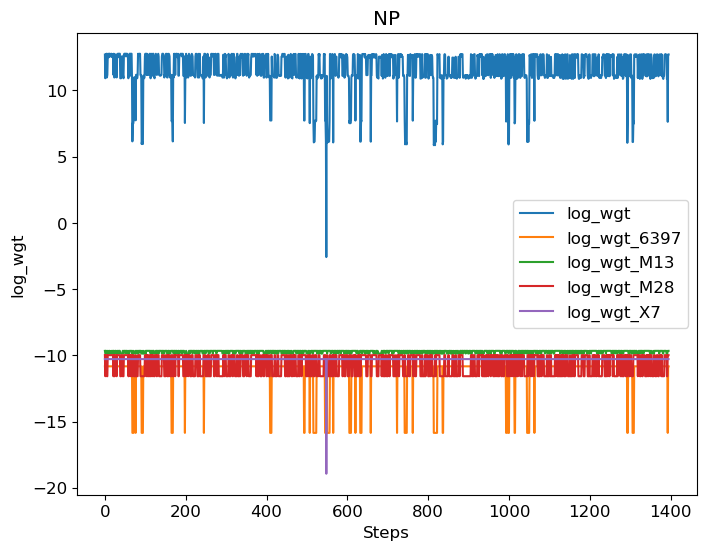

In [54]:
plt.figure(figsize=(8,6))
plt.plot(log_wgt, label='log_wgt')
#plt.plot(log_wgt_pop, label='log_wgt_pop')
#plt.plot(log_wgt_6304, label='log_wgt_6304')
plt.plot(log_wgt_6397, label='log_wgt_6397')
plt.plot(log_wgt_M13, label='log_wgt_M13')
plt.plot(log_wgt_M28, label='log_wgt_M28')
#plt.plot(log_wgt_M30, label='log_wgt_M30')
#plt.plot(log_wgt_wCen, label='log_wgt_wCen')
plt.plot(log_wgt_X7, label='log_wgt_X7')
#plt.plot(log_wgt_1810b, label='log_wgt_1810b')
#plt.plot(log_wgt_1724b, label='log_wgt_1724b')
#plt.plot(log_wgt_1702, label='log_wgt_1702')
#plt.plot(log_wgt_0030, label='log_wgt_0030')
#plt.plot(log_wgt_0740, label='log_wgt_0740')
plt.xlabel('Steps')
plt.ylabel('log_wgt')
plt.title('NP')
plt.legend()
plt.show()


In [2]:
mchain = h5py.File('nl_54_init','r')['markov_chain_0']
mult = np.array(mchain['data']['mult'])

R_0  = np.array(mchain['data']['R_0']);  R_0  = R_0[np.nonzero(R_0)];
R_1  = np.array(mchain['data']['R_1']);  R_1  = R_1[np.nonzero(R_1)];
R_2  = np.array(mchain['data']['R_2']);  R_2  = R_2[np.nonzero(R_2)];
R_3  = np.array(mchain['data']['R_3']);  R_3  = R_3[np.nonzero(R_3)];
R_4  = np.array(mchain['data']['R_4']);  R_4  = R_4[np.nonzero(R_4)];
R_5  = np.array(mchain['data']['R_5']);  R_5  = R_5[np.nonzero(R_5)];
R_6  = np.array(mchain['data']['R_6']);  R_6  = R_6[np.nonzero(R_6)];
R_7  = np.array(mchain['data']['R_7']);  R_7  = R_7[np.nonzero(R_7)];
R_8  = np.array(mchain['data']['R_8']);  R_8  = R_8[np.nonzero(R_8)];
R_9  = np.array(mchain['data']['R_9']);  R_9  = R_9[np.nonzero(R_9)];
R_10 = np.array(mchain['data']['R_10']); R_10 = R_10[np.nonzero(R_10)];
R_11 = np.array(mchain['data']['R_11']); R_11 = R_11[np.nonzero(R_11)];
R_12 = np.array(mchain['data']['R_12']); R_12 = R_12[np.nonzero(R_12)];
R_13 = np.array(mchain['data']['R_13']); R_13 = R_13[np.nonzero(R_13)];
R_14 = np.array(mchain['data']['R_14']); R_14 = R_14[np.nonzero(R_14)];
R_15 = np.array(mchain['data']['R_15']); R_15 = R_15[np.nonzero(R_15)];
R_16 = np.array(mchain['data']['R_16']); R_16 = R_16[np.nonzero(R_16)];
R_17 = np.array(mchain['data']['R_17']); R_17 = R_17[np.nonzero(R_17)];
R_18 = np.array(mchain['data']['R_18']); R_18 = R_18[np.nonzero(R_18)];
R_19 = np.array(mchain['data']['R_19']); R_19 = R_19[np.nonzero(R_19)];
R_20 = np.array(mchain['data']['R_20']); R_20 = R_20[np.nonzero(R_20)];
R_21 = np.array(mchain['data']['R_21']); R_21 = R_21[np.nonzero(R_21)];
R_22 = np.array(mchain['data']['R_22']); R_22 = R_22[np.nonzero(R_22)];
R_23 = np.array(mchain['data']['R_23']); R_23 = R_23[np.nonzero(R_23)];
R_24 = np.array(mchain['data']['R_24']); R_24 = R_24[np.nonzero(R_24)];
R_25 = np.array(mchain['data']['R_25']); R_25 = R_25[np.nonzero(R_25)];
R_26 = np.array(mchain['data']['R_26']); R_26 = R_26[np.nonzero(R_26)];
R_27 = np.array(mchain['data']['R_27']); R_27 = R_27[np.nonzero(R_27)];
R_28 = np.array(mchain['data']['R_28']); R_28 = R_28[np.nonzero(R_28)];
R_29 = np.array(mchain['data']['R_29']); R_29 = R_29[np.nonzero(R_29)];
R_30 = np.array(mchain['data']['R_30']); R_30 = R_30[np.nonzero(R_30)];
R_31 = np.array(mchain['data']['R_31']); R_31 = R_31[np.nonzero(R_31)];
R_32 = np.array(mchain['data']['R_32']); R_32 = R_32[np.nonzero(R_32)];
R_33 = np.array(mchain['data']['R_33']); R_33 = R_33[np.nonzero(R_33)];
R_34 = np.array(mchain['data']['R_34']); R_34 = R_34[np.nonzero(R_34)];
R_35 = np.array(mchain['data']['R_35']); R_35 = R_35[np.nonzero(R_35)];
R_36 = np.array(mchain['data']['R_36']); R_36 = R_36[np.nonzero(R_36)];
R_37 = np.array(mchain['data']['R_37']); R_37 = R_37[np.nonzero(R_37)];
R_38 = np.array(mchain['data']['R_38']); R_38 = R_38[np.nonzero(R_38)];
R_39 = np.array(mchain['data']['R_39']); R_39 = R_39[np.nonzero(R_39)];
R_40 = np.array(mchain['data']['R_40']); R_40 = R_40[np.nonzero(R_40)];
R_41 = np.array(mchain['data']['R_41']); R_41 = R_41[np.nonzero(R_41)];
R_42 = np.array(mchain['data']['R_42']); R_42 = R_42[np.nonzero(R_42)];
R_43 = np.array(mchain['data']['R_43']); R_43 = R_43[np.nonzero(R_43)];
R_44 = np.array(mchain['data']['R_44']); R_44 = R_44[np.nonzero(R_44)];
R_45 = np.array(mchain['data']['R_45']); R_45 = R_45[np.nonzero(R_45)];
R_46 = np.array(mchain['data']['R_46']); R_46 = R_46[np.nonzero(R_46)];
R_47 = np.array(mchain['data']['R_47']); R_47 = R_47[np.nonzero(R_47)];
R_48 = np.array(mchain['data']['R_48']); R_48 = R_48[np.nonzero(R_48)];
R_49 = np.array(mchain['data']['R_49']); R_49 = R_49[np.nonzero(R_49)];
R_50 = np.array(mchain['data']['R_50']); R_50 = R_50[np.nonzero(R_50)];
R_51 = np.array(mchain['data']['R_51']); R_51 = R_51[np.nonzero(R_51)];
R_52 = np.array(mchain['data']['R_52']); R_52 = R_52[np.nonzero(R_52)];
R_53 = np.array(mchain['data']['R_53']); R_53 = R_53[np.nonzero(R_53)];
R_54 = np.array(mchain['data']['R_54']); R_54 = R_54[np.nonzero(R_54)];
R_55 = np.array(mchain['data']['R_55']); R_55 = R_55[np.nonzero(R_55)];
R_56 = np.array(mchain['data']['R_56']); R_56 = R_56[np.nonzero(R_56)];
R_57 = np.array(mchain['data']['R_57']); R_57 = R_57[np.nonzero(R_57)];
R_58 = np.array(mchain['data']['R_58']); R_58 = R_58[np.nonzero(R_58)];
R_59 = np.array(mchain['data']['R_59']); R_59 = R_59[np.nonzero(R_59)];
R_60 = np.array(mchain['data']['R_60']); R_60 = R_60[np.nonzero(R_60)];
R_61 = np.array(mchain['data']['R_61']); R_61 = R_61[np.nonzero(R_61)];
R_62 = np.array(mchain['data']['R_62']); R_62 = R_62[np.nonzero(R_62)];
R_63 = np.array(mchain['data']['R_63']); R_63 = R_63[np.nonzero(R_63)];
R_64 = np.array(mchain['data']['R_64']); R_64 = R_64[np.nonzero(R_64)];
R_65 = np.array(mchain['data']['R_65']); R_65 = R_65[np.nonzero(R_65)];
R_66 = np.array(mchain['data']['R_66']); R_66 = R_66[np.nonzero(R_66)];
R_67 = np.array(mchain['data']['R_67']); R_67 = R_67[np.nonzero(R_67)];
R_68 = np.array(mchain['data']['R_68']); R_68 = R_68[np.nonzero(R_68)];
R_69 = np.array(mchain['data']['R_69']); R_69 = R_69[np.nonzero(R_69)];
R_70 = np.array(mchain['data']['R_70']); R_70 = R_70[np.nonzero(R_70)];
R_71 = np.array(mchain['data']['R_71']); R_71 = R_71[np.nonzero(R_71)];
R_72 = np.array(mchain['data']['R_72']); R_72 = R_72[np.nonzero(R_72)];
R_73 = np.array(mchain['data']['R_73']); R_73 = R_73[np.nonzero(R_73)];
R_74 = np.array(mchain['data']['R_74']); R_74 = R_74[np.nonzero(R_74)];
R_75 = np.array(mchain['data']['R_75']); R_75 = R_75[np.nonzero(R_75)];
R_76 = np.array(mchain['data']['R_76']); R_76 = R_76[np.nonzero(R_76)];
R_77 = np.array(mchain['data']['R_77']); R_77 = R_77[np.nonzero(R_77)];
R_78 = np.array(mchain['data']['R_78']); R_78 = R_78[np.nonzero(R_78)];
R_79 = np.array(mchain['data']['R_79']); R_79 = R_79[np.nonzero(R_79)];
R_80 = np.array(mchain['data']['R_80']); R_80 = R_80[np.nonzero(R_80)];
R_81 = np.array(mchain['data']['R_81']); R_81 = R_81[np.nonzero(R_81)];
R_82 = np.array(mchain['data']['R_82']); R_82 = R_82[np.nonzero(R_82)];
R_83 = np.array(mchain['data']['R_83']); R_83 = R_83[np.nonzero(R_83)];
R_84 = np.array(mchain['data']['R_84']); R_84 = R_84[np.nonzero(R_84)];
R_85 = np.array(mchain['data']['R_85']); R_85 = R_85[np.nonzero(R_85)];
R_86 = np.array(mchain['data']['R_86']); R_86 = R_86[np.nonzero(R_86)];
R_87 = np.array(mchain['data']['R_87']); R_87 = R_87[np.nonzero(R_87)];
R_88 = np.array(mchain['data']['R_88']); R_88 = R_88[np.nonzero(R_88)];
R_89 = np.array(mchain['data']['R_89']); R_89 = R_89[np.nonzero(R_89)];
R_90 = np.array(mchain['data']['R_90']); R_90 = R_90[np.nonzero(R_90)];
R_91 = np.array(mchain['data']['R_91']); R_91 = R_91[np.nonzero(R_91)];
R_92 = np.array(mchain['data']['R_92']); R_92 = R_92[np.nonzero(R_92)];
R_93 = np.array(mchain['data']['R_93']); R_93 = R_93[np.nonzero(R_93)];
R_94 = np.array(mchain['data']['R_94']); R_94 = R_94[np.nonzero(R_94)];
R_95 = np.array(mchain['data']['R_95']); R_95 = R_95[np.nonzero(R_95)];
R_96 = np.array(mchain['data']['R_96']); R_96 = R_96[np.nonzero(R_96)];
R_97 = np.array(mchain['data']['R_97']); R_97 = R_97[np.nonzero(R_97)];
R_98 = np.array(mchain['data']['R_98']); R_98 = R_98[np.nonzero(R_98)];
R_99 = np.array(mchain['data']['R_99']); R_99 = R_99[np.nonzero(R_99)];
R_avg = np.array([np.mean(R_0),  np.mean(R_1),  np.mean(R_2),  np.mean(R_3),  np.mean(R_4),  np.mean(R_5),  np.mean(R_6),  np.mean(R_7),  np.mean(R_8),  np.mean(R_9), \
                  np.mean(R_10), np.mean(R_11), np.mean(R_12), np.mean(R_13), np.mean(R_14), np.mean(R_15), np.mean(R_16), np.mean(R_17), np.mean(R_18), np.mean(R_19), \
                  np.mean(R_20), np.mean(R_21), np.mean(R_22), np.mean(R_23), np.mean(R_24), np.mean(R_25), np.mean(R_26), np.mean(R_27), np.mean(R_28), np.mean(R_29), \
                  np.mean(R_30), np.mean(R_31), np.mean(R_32), np.mean(R_33), np.mean(R_34), np.mean(R_35), np.mean(R_36), np.mean(R_37), np.mean(R_38), np.mean(R_39), \
                  np.mean(R_40), np.mean(R_41), np.mean(R_42), np.mean(R_43), np.mean(R_44), np.mean(R_45), np.mean(R_46), np.mean(R_47), np.mean(R_48), np.mean(R_49), \
                  np.mean(R_50), np.mean(R_51), np.mean(R_52), np.mean(R_53), np.mean(R_54), np.mean(R_55), np.mean(R_56), np.mean(R_57), np.mean(R_58), np.mean(R_59), \
                  np.mean(R_60), np.mean(R_61), np.mean(R_62), np.mean(R_63), np.mean(R_64), np.mean(R_65), np.mean(R_66), np.mean(R_67), np.mean(R_68), np.mean(R_69), \
                  np.mean(R_70), np.mean(R_71), np.mean(R_72), np.mean(R_73), np.mean(R_74), np.mean(R_75), np.mean(R_76), np.mean(R_77), np.mean(R_78), np.mean(R_79), \
                  np.mean(R_80), np.mean(R_81), np.mean(R_82), np.mean(R_83), np.mean(R_84), np.mean(R_85), np.mean(R_86), np.mean(R_87), np.mean(R_88), np.mean(R_89), \
                  np.mean(R_90), np.mean(R_91), np.mean(R_92), np.mean(R_93), np.mean(R_94), np.mean(R_95), np.mean(R_96), np.mean(R_97), np.mean(R_98), np.mean(R_99)])

R_std = np.array([np.std(R_0),  np.std(R_1),  np.std(R_2),  np.std(R_3),  np.std(R_4),  np.std(R_5),  np.std(R_6),  np.std(R_7),  np.std(R_8),  np.std(R_9), \
                  np.std(R_10), np.std(R_11), np.std(R_12), np.std(R_13), np.std(R_14), np.std(R_15), np.std(R_16), np.std(R_17), np.std(R_18), np.std(R_19), \
                  np.std(R_20), np.std(R_21), np.std(R_22), np.std(R_23), np.std(R_24), np.std(R_25), np.std(R_26), np.std(R_27), np.std(R_28), np.std(R_29), \
                  np.std(R_30), np.std(R_31), np.std(R_32), np.std(R_33), np.std(R_34), np.std(R_35), np.std(R_36), np.std(R_37), np.std(R_38), np.std(R_39), \
                  np.std(R_40), np.std(R_41), np.std(R_42), np.std(R_43), np.std(R_44), np.std(R_45), np.std(R_46), np.std(R_47), np.std(R_48), np.std(R_49), \
                  np.std(R_50), np.std(R_51), np.std(R_52), np.std(R_53), np.std(R_54), np.std(R_55), np.std(R_56), np.std(R_57), np.std(R_58), np.std(R_59), \
                  np.std(R_60), np.std(R_61), np.std(R_62), np.std(R_63), np.std(R_64), np.std(R_65), np.std(R_66), np.std(R_67), np.std(R_68), np.std(R_69), \
                  np.std(R_70), np.std(R_71), np.std(R_72), np.std(R_73), np.std(R_74), np.std(R_75), np.std(R_76), np.std(R_77), np.std(R_78), np.std(R_79), \
                  np.std(R_80), np.std(R_81), np.std(R_82), np.std(R_83), np.std(R_84), np.std(R_85), np.std(R_86), np.std(R_87), np.std(R_88), np.std(R_89), \
                  np.std(R_90), np.std(R_91), np.std(R_92), np.std(R_93), np.std(R_94), np.std(R_95), np.std(R_96), np.std(R_97), np.std(R_98), np.std(R_99)])

/home/anik/mconda/envs/tfg/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anik/mconda/envs/tfg/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anik/mconda/envs/tfg/lib/python3.12/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anik/mconda/envs/tfg/lib/python3.12/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anik/mconda/envs/tfg/lib/python3.12/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [9]:
R_avg_53 = R_avg
R_std_53 = R_std

In [ ]:
R_avg

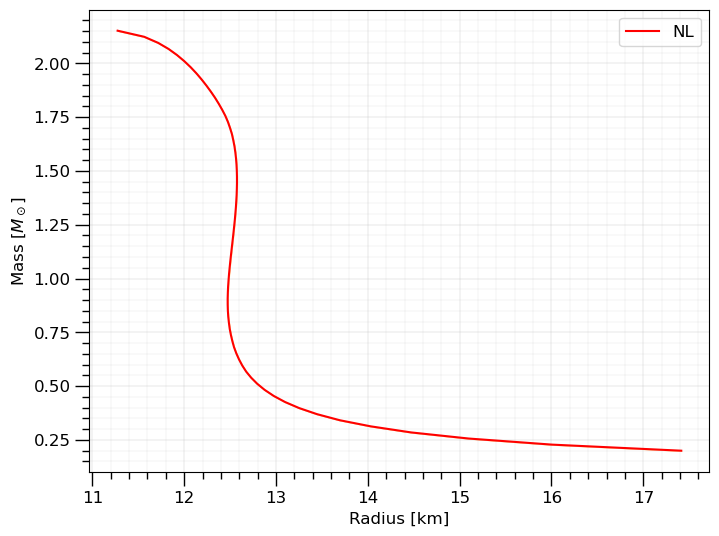

In [4]:
gm = np.linspace(0.2, 3.0, 100, dtype=float)
mult   = np.array(mchain['data']['mult'])
nlines = np.array(mchain['nlines'])[0]

plt.figure(figsize=(8,6))
plt.fill_betweenx(gm, R_avg-R_std, R_avg+R_std, color='orange', alpha=0.3)
plt.plot(R_avg, gm, label='NL', color='red')
#plt.xlim(11.4, 12.6)
#plt.ylim(1.0,2.12)
    
plt.xlabel('Radius [km]')
plt.ylabel(r'Mass [$M_\odot$]')
plt.minorticks_on()
plt.tick_params('both', length=10, width=1, which='major')
plt.tick_params('both', length=5, width=1, which='minor')
plt.grid(which='major', linewidth=0.2, visible=True)
plt.grid(which='minor', linewidth=0.1, visible=True)
plt.legend()
plt.show()